# Analisis

En este notebook analizamos los resultados de los experimentos

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from typing import Dict

In [5]:
# Leemos los resultados para luego analizar cada dataset/experimento
sns.set_style("whitegrid")
df_results = pd.read_csv("resultados.csv")

In [6]:
# instancias/control/n_19-i_1.in

def parse_instance(filename: str) -> Dict[str, str]:
    instance = filename.split('/')[2]
    # -3 por el ''.in'
    pairs = instance[:-3].split('-')
    
    attrs = {}
    for pair in pairs:
        k, v = pair.split('_')
        attrs[k] = v
    
    return attrs

def generate_attrs(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    attrs = parse_instance(df["instance"].iloc[0])
    for k in attrs.keys():
        df[k] = df["instance"].map(lambda r: int(parse_instance(r)[k]))
    
    return df
    
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

### Complejidad BT-F

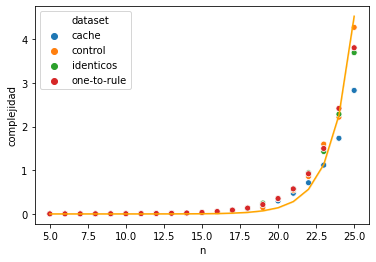

In [23]:
df = generate_attrs(df_results[(df_results["algorithm"] == "BT-F") & (df_results["dataset"] != "low-M")])
df["complejidad"] = (2.0 ** df["n"]) * 0.000000135 # Exponencial
g = df.groupby(["dataset", "n"], as_index=False).mean()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")
fig = sns.lineplot(data=g, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9621436042503788


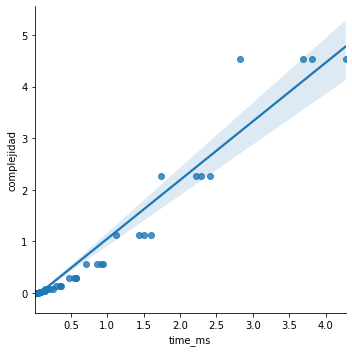

In [24]:
fig = sns.lmplot(data=g, x="time_ms", y="complejidad");
# pirson
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"));

### Complejidad BT-O-C

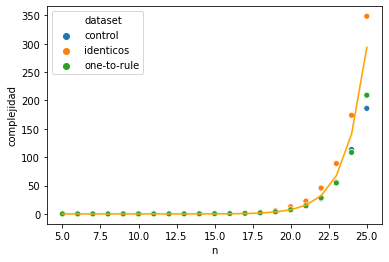

In [25]:
df = generate_attrs(df_results[df_results["algorithm"] == "BT-O-C"])
df["complejidad"] = (2.0 ** df["n"]) * df["n"]* 0.00000035 # Exponencial
g = df.groupby(["dataset", "n"], as_index=False).mean()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")
fig = sns.lineplot(data=g, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9597843765127868


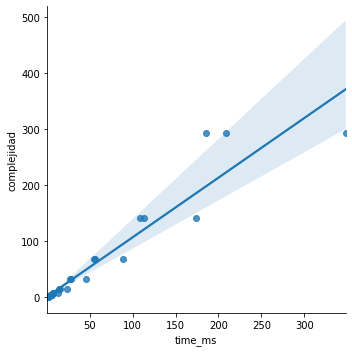

In [26]:
fig = sns.lmplot(data=g, x="time_ms", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"));

### Complejidad BT-O-G

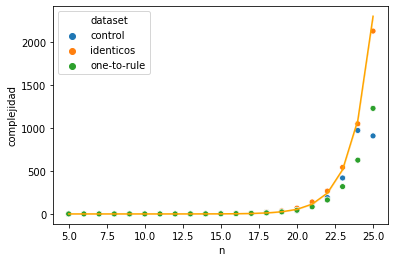

In [31]:
df = generate_attrs(df_results[(df_results["algorithm"] == "BT-O-G")]) # & (df_results["dataset"] == "identicos")])
df["complejidad"] = (2.0 ** df["n"]) * (np.log(df["n"]) * df["n"]) * 0.00000085 # Exponencial
g = df.groupby(["dataset", "n"], as_index=False).median()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")

fig = sns.lineplot(data=df, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9576207881836593


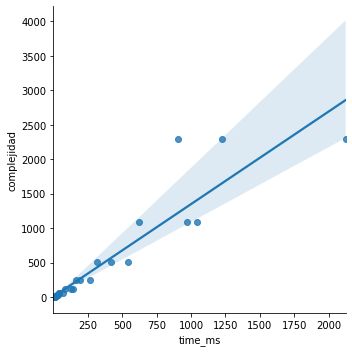

In [47]:
fig = sns.lmplot(data=g, x="time_ms", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"));

### Complejidad FB

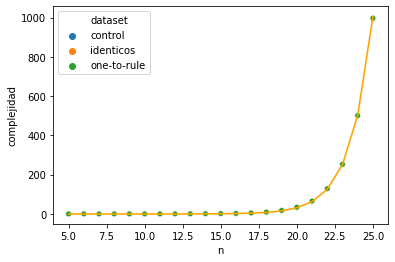

In [48]:
df = generate_attrs(df_results[df_results["algorithm"] == "FB"])
df["complejidad"] = (2.0 ** df["n"]) * 0.00003 # Exponencial
g = df.groupby(["dataset", "n"], as_index=False).mean()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")

fig = sns.lineplot(data=df, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9999373755392265


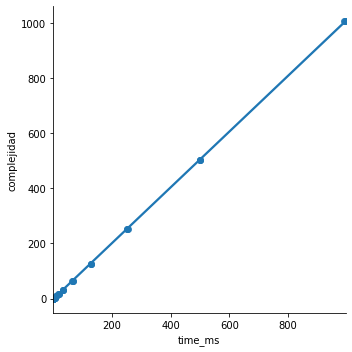

In [49]:
fig = sns.lmplot(data=g, x="time_ms", y="complejidad");
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"));

### Complejidad DP

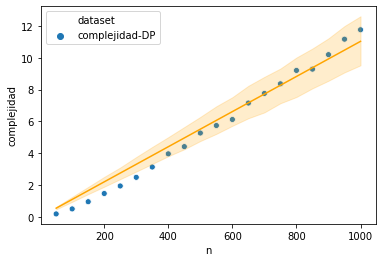

In [77]:
df = generate_attrs(df_results[(df_results["dataset"] == "complejidad-DP")])
df["complejidad"] = df["n"] * df["m"] * 0.000021 # Exponencial
g = df.groupby(["dataset", "n"], as_index=False).median()
sns.scatterplot(data=g, x="n", y="time_ms", hue="dataset")

fig = sns.lineplot(data=df, x='n', y='complejidad', color="orange")

Índice de correlación de Pearson: 0.9868145465532252


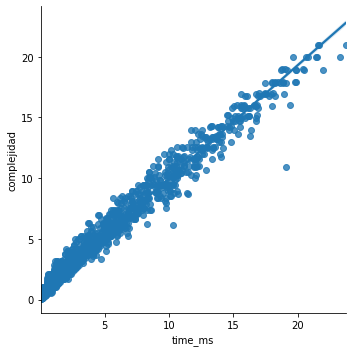

In [82]:
fig = sns.lmplot(data=df, x="time_ms", y="complejidad")
print("Índice de correlación de Pearson:", correlacion_pearson(df, "time_ms", "complejidad"))

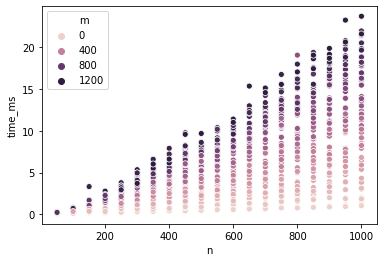

In [70]:
sns.scatterplot(data=df, x="n", y="time_ms", hue="m")

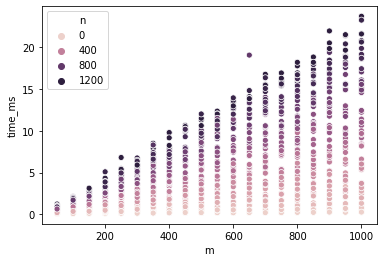

In [71]:
sns.scatterplot(data=df, x="m", y="time_ms", hue="n")

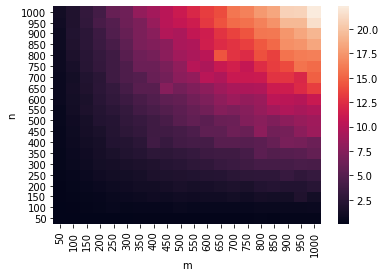

In [72]:
df_hm = df.pivot_table(values="time_ms", index=["n"], columns=["m"], aggfunc=np.mean)

ax = sns.heatmap(data=df_hm)
ax.invert_yaxis()

In [83]:
df["complejidad"] = df["n"]*df["m"]

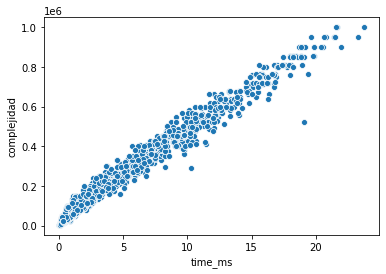

In [75]:
sns.scatterplot(data=df, y="complejidad", x="time_ms")

## Comparativa entre algoritmos 

_By Manuel_

,Unnamed: 0,dataset,algorithm,time_ms,instance,n,i
0,0,control,FB,21.170000,instancias/control/n_19-i_1.in,19,1
1,1,control,BT,0.639613,instancias/control/n_19-i_1.in,19,1
2,2,control,BT-F,0.214931,instancias/control/n_19-i_1.in,19,1
3,3,control,BT-O-G,35.091400,instancias/control/n_19-i_1.in,19,1
4,4,control,BT-O-C,4.796100,instancias/control/n_19-i_1.in,19,1
...,...,...,...,...,...,...,...
373,373,control,BT,6.382410,instancias/control/n_24-i_0.in,24,0
374,374,control,BT-F,2.223030,instancias/control/n_24-i_0.in,24,0
375,375,control,BT-O-G,1020.040000,instancias/control/n_24-i_0.in,24,0
376,376,control,BT-O-C,135.938000,instancias/control/n_24-i_0.in,24,0


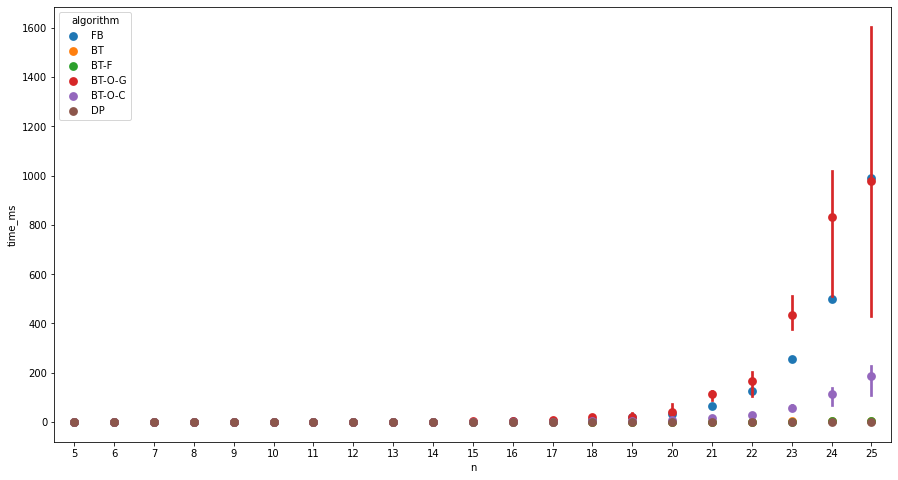

In [18]:
df_control = generate_attrs(df_results[(df_results["dataset"] == "control")])
plt.subplots(figsize=(15,8))
sns.pointplot(data=df_control, x="n", y="time_ms", hue="algorithm", join=False)

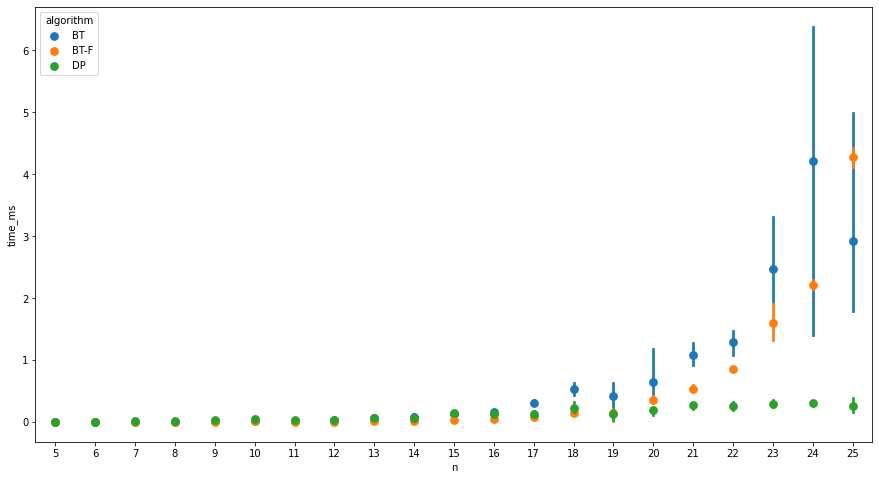

In [32]:
df_control = generate_attrs(df_results[(df_results["dataset"] == "control") & (df_results["algorithm"].isin(["BT", "BT-F", "DP"]))])
plt.subplots(figsize=(15,8))
sns.pointplot(data=df_control, x="n", y="time_ms", hue="algorithm", join=False)

## Performance de las podas

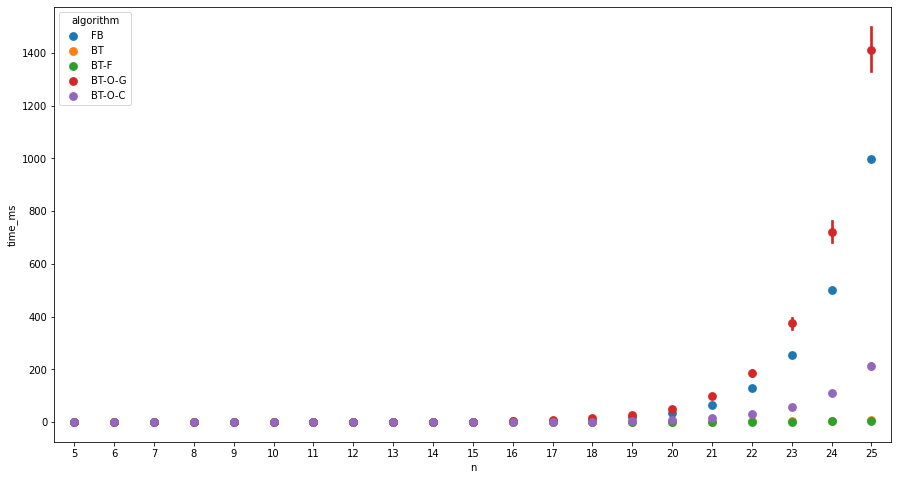

In [21]:
df_podas = generate_attrs(df_results[(df_results["algorithm"] != "DP")])
plt.subplots(figsize=(15,8))
sns.pointplot(data=df_podas, x="n", y="time_ms", hue="algorithm", join=False)

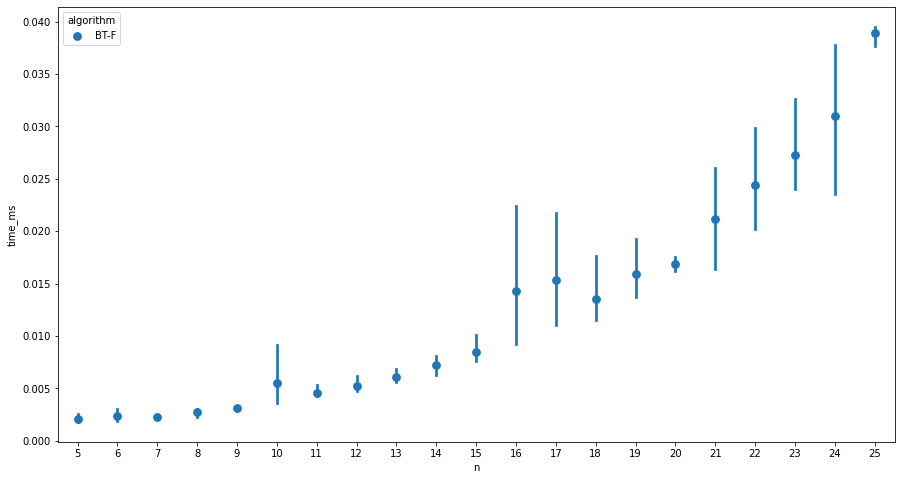

In [24]:
df_low_m = generate_attrs(df_podas[df_podas["dataset"] == "low-M"])
plt.subplots(figsize=(15,8))
sns.pointplot(data=df_low_m, x="n", y="time_ms", hue="algorithm", join=False)

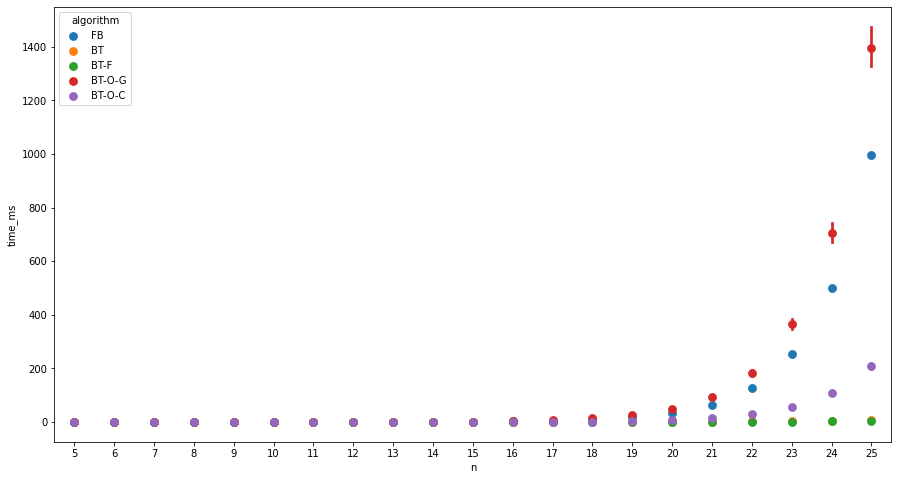

In [26]:
df_otr = generate_attrs(df_podas[df_podas["dataset"] == "one-to-rule"])
plt.subplots(figsize=(15,8))
sns.pointplot(data=df_otr, x="n", y="time_ms", hue="algorithm", join=False)

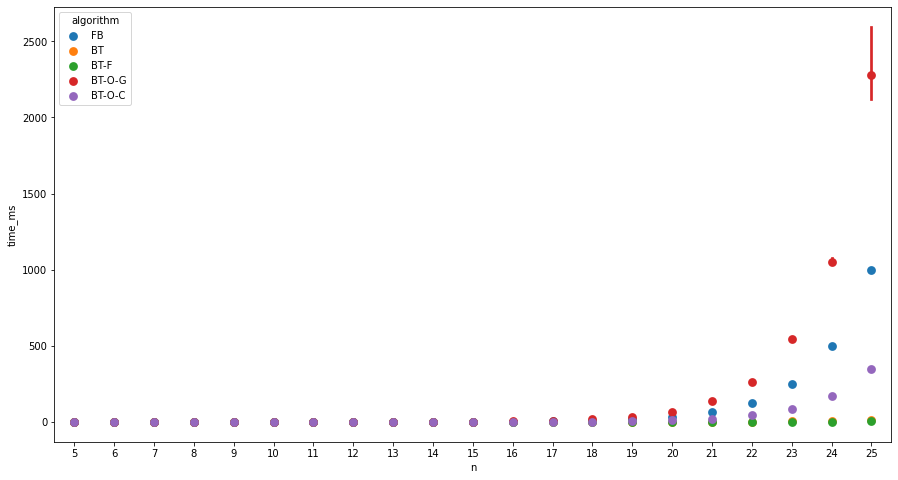

In [28]:
df_id = generate_attrs(df_podas[df_podas["dataset"] == "identicos"])
plt.subplots(figsize=(15,8))
sns.pointplot(data=df_id, x="n", y="time_ms", hue="algorithm", join=False)

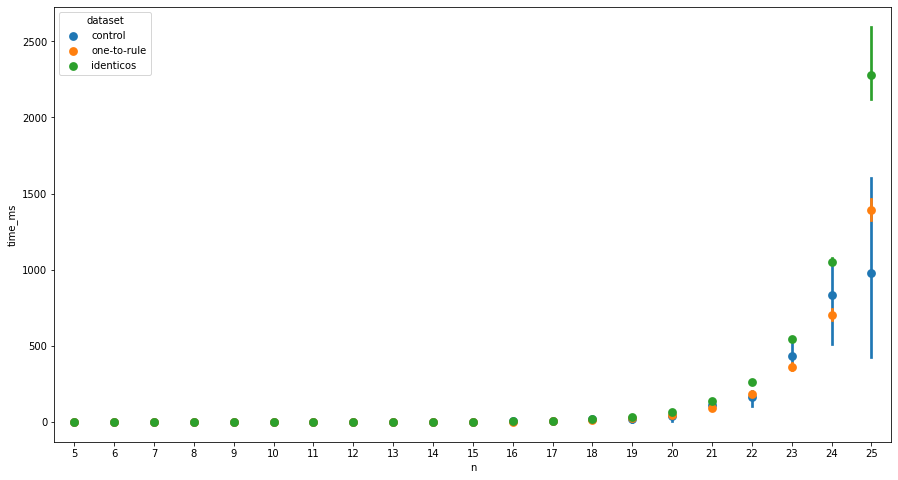

In [33]:
df_btog = generate_attrs(df_podas[df_podas["algorithm"] == "BT-O-G"])
plt.subplots(figsize=(15,8))
sns.pointplot(data=df_btog, x="n", y="time_ms", hue="dataset", join=False)

### Posición del locale especial en optimalidad

Alcanza con mostrar un boxplot para todas las posiciones posibles en el caso de tener 25 locales

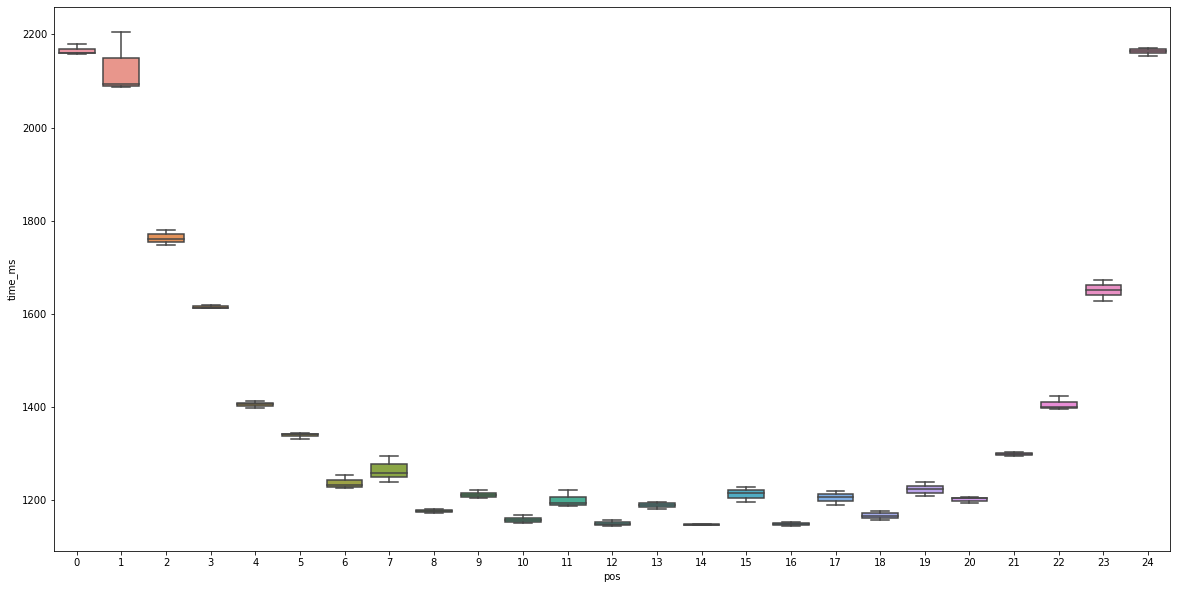

In [59]:
df_posic = generate_attrs(df_podas[(df_podas["dataset"] == "one-to-rule") & (df_podas["n"] == 25) & (df_podas["algorithm"] == "BT-O-G")])
plt.subplots(figsize=(20,10))
sns.boxplot(data=df_posic, x="pos", y="time_ms")

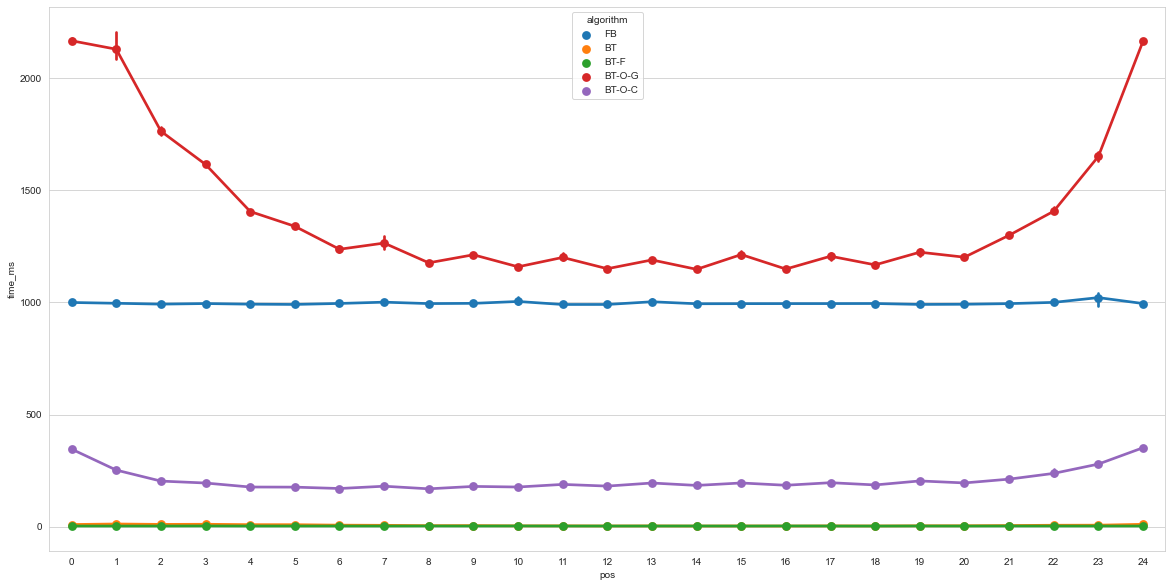

In [69]:
df_posic = generate_attrs(df_podas[(df_podas["dataset"] == "one-to-rule") & (df_podas["n"] == 25)])
plt.subplots(figsize=(20,10))
sns.pointplot(data=df_posic, x="pos", y="time_ms", hue="algorithm", join=True)

## Solapamiento (grupos)

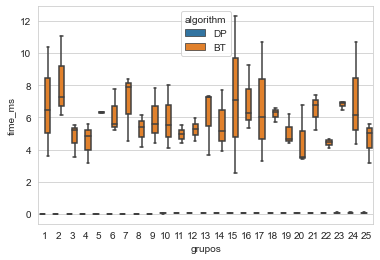

In [96]:
df_grupos = generate_attrs(df_results[(df_results["dataset"] == "grupos")])
df_grupos_25 = df_grupos[df_grupos["n"]==25]
sns.boxplot(data=df_grupos_25.sort_values("grupos"), x="grupos", y="time_ms", hue="algorithm")

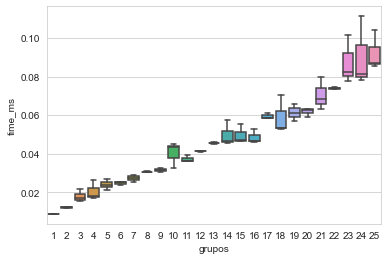

In [97]:
df_grupos = generate_attrs(df_results[(df_results["dataset"] == "grupos") & (df_results["algorithm"]=="DP")])
df_grupos_25 = df_grupos[df_grupos["n"]==25]
sns.boxplot(data=df_grupos_25.sort_values("grupos"), x="grupos", y="time_ms")

## Caché

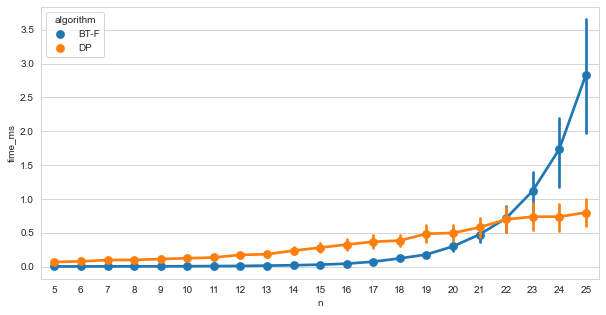

In [100]:
df_cache = generate_attrs(df_results[(df_results["dataset"] == "cache")])
plt.subplots(figsize=(10,5))
sns.pointplot(data=df_cache, x="n", y="time_ms", hue="algorithm")

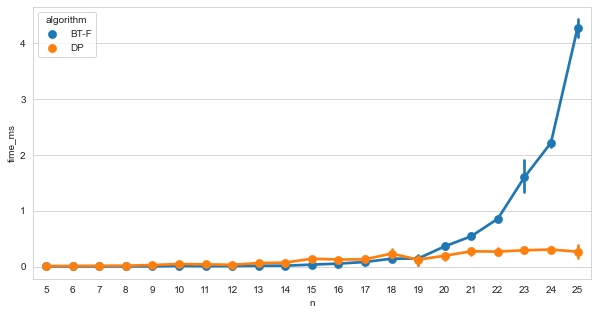

In [101]:
df_cache = generate_attrs(df_results[(df_results["dataset"] == "control") & df_results["algorithm"].isin(["DP", "BT-F"])])
plt.subplots(figsize=(10,5))
sns.pointplot(data=df_cache, x="n", y="time_ms", hue="algorithm")

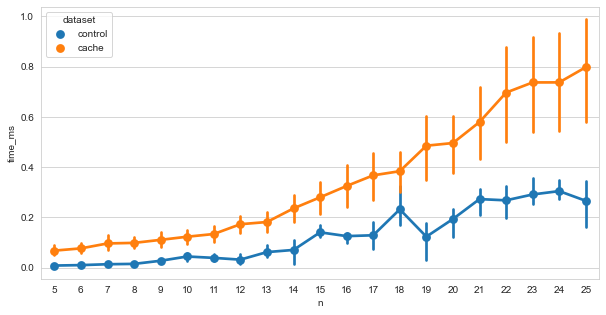

In [106]:
df_cache = generate_attrs(df_results[(df_results["dataset"].isin(["control", "cache"])) & (df_results["algorithm"] == "DP")])
plt.subplots(figsize=(10,5))
sns.pointplot(data=df_cache, x="n", y="time_ms", hue="dataset")

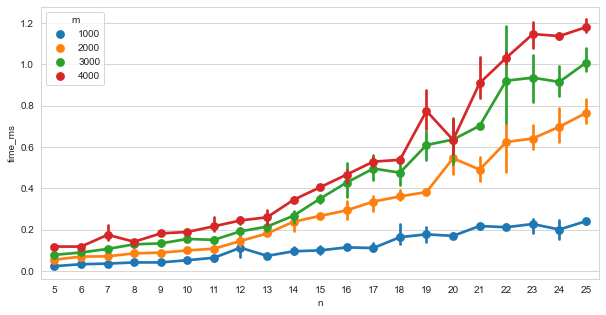

In [112]:
df_cache = generate_attrs(df_results[(df_results["dataset"] == "cache") & (df_results["algorithm"] == "DP")])
plt.subplots(figsize=(10,5))
sns.pointplot(data=df_cache, x="n", y="time_ms", hue="m")